Wafer fault Prediction
Brief: In electronics, a wafer (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer.

Problem Statement
Data: Wafers data

Problem Statement: Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

Solution: Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create datafrome and read the dataset
df = pd.read_csv(r'C:\Users\jasmi\DataScienceCourse\WaterFaultDetection\artifacts\wafer_fault.csv')
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [5]:
# Columns
df.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [9]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [17]:
df.drop(columns=['Unnamed: 0','Good/Bad']).iloc[:100].to_csv('test1.csv',index=False)

In [21]:
df['wafers']=df['Unnamed: 0']

In [23]:
df.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586', 'Sensor-587',
       'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad', 'wafers'],
      dtype='object', length=593)

In [25]:
df.rename(columns={'Unnamed: 0': 'Wafers'},inplace=True )

In [27]:
df.drop(columns='wafers',axis=1 , inplace=True)

In [29]:
df.columns

Index(['Wafers', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5',
       'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [35]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size=.2,random_state=42)

In [37]:
train_df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


In [39]:
train_df.head()

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafers to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [45]:
#sum=train_df[train_df.isna()].sum()
sum=train_df.isna().sum()

In [49]:
## Check missing vals in dependent feature variables
train_df.isna().sum().sum() / (train_df.shape[0] * (train_df.shape[1] - 1))

0.038536379018612524

In [51]:
train_df.shape

(80, 592)

Visualization of Sensors' Distribution

In [53]:
enumerate(train_df.columns[1:51])

In [55]:
for i,cols in enumerate(train_df.columns[1:51]):
    print({i:cols})

{0: 'Sensor-1'}
{1: 'Sensor-2'}
{2: 'Sensor-3'}
{3: 'Sensor-4'}
{4: 'Sensor-5'}
{5: 'Sensor-6'}
{6: 'Sensor-7'}
{7: 'Sensor-8'}
{8: 'Sensor-9'}
{9: 'Sensor-10'}
{10: 'Sensor-11'}
{11: 'Sensor-12'}
{12: 'Sensor-13'}
{13: 'Sensor-14'}
{14: 'Sensor-15'}
{15: 'Sensor-16'}
{16: 'Sensor-17'}
{17: 'Sensor-18'}
{18: 'Sensor-19'}
{19: 'Sensor-20'}
{20: 'Sensor-21'}
{21: 'Sensor-22'}
{22: 'Sensor-23'}
{23: 'Sensor-24'}
{24: 'Sensor-25'}
{25: 'Sensor-26'}
{26: 'Sensor-27'}
{27: 'Sensor-28'}
{28: 'Sensor-29'}
{29: 'Sensor-30'}
{30: 'Sensor-31'}
{31: 'Sensor-32'}
{32: 'Sensor-33'}
{33: 'Sensor-34'}
{34: 'Sensor-35'}
{35: 'Sensor-36'}
{36: 'Sensor-37'}
{37: 'Sensor-38'}
{38: 'Sensor-39'}
{39: 'Sensor-40'}
{40: 'Sensor-41'}
{41: 'Sensor-42'}
{42: 'Sensor-43'}
{43: 'Sensor-44'}
{44: 'Sensor-45'}
{45: 'Sensor-46'}
{46: 'Sensor-47'}
{47: 'Sensor-48'}
{48: 'Sensor-49'}
{49: 'Sensor-50'}


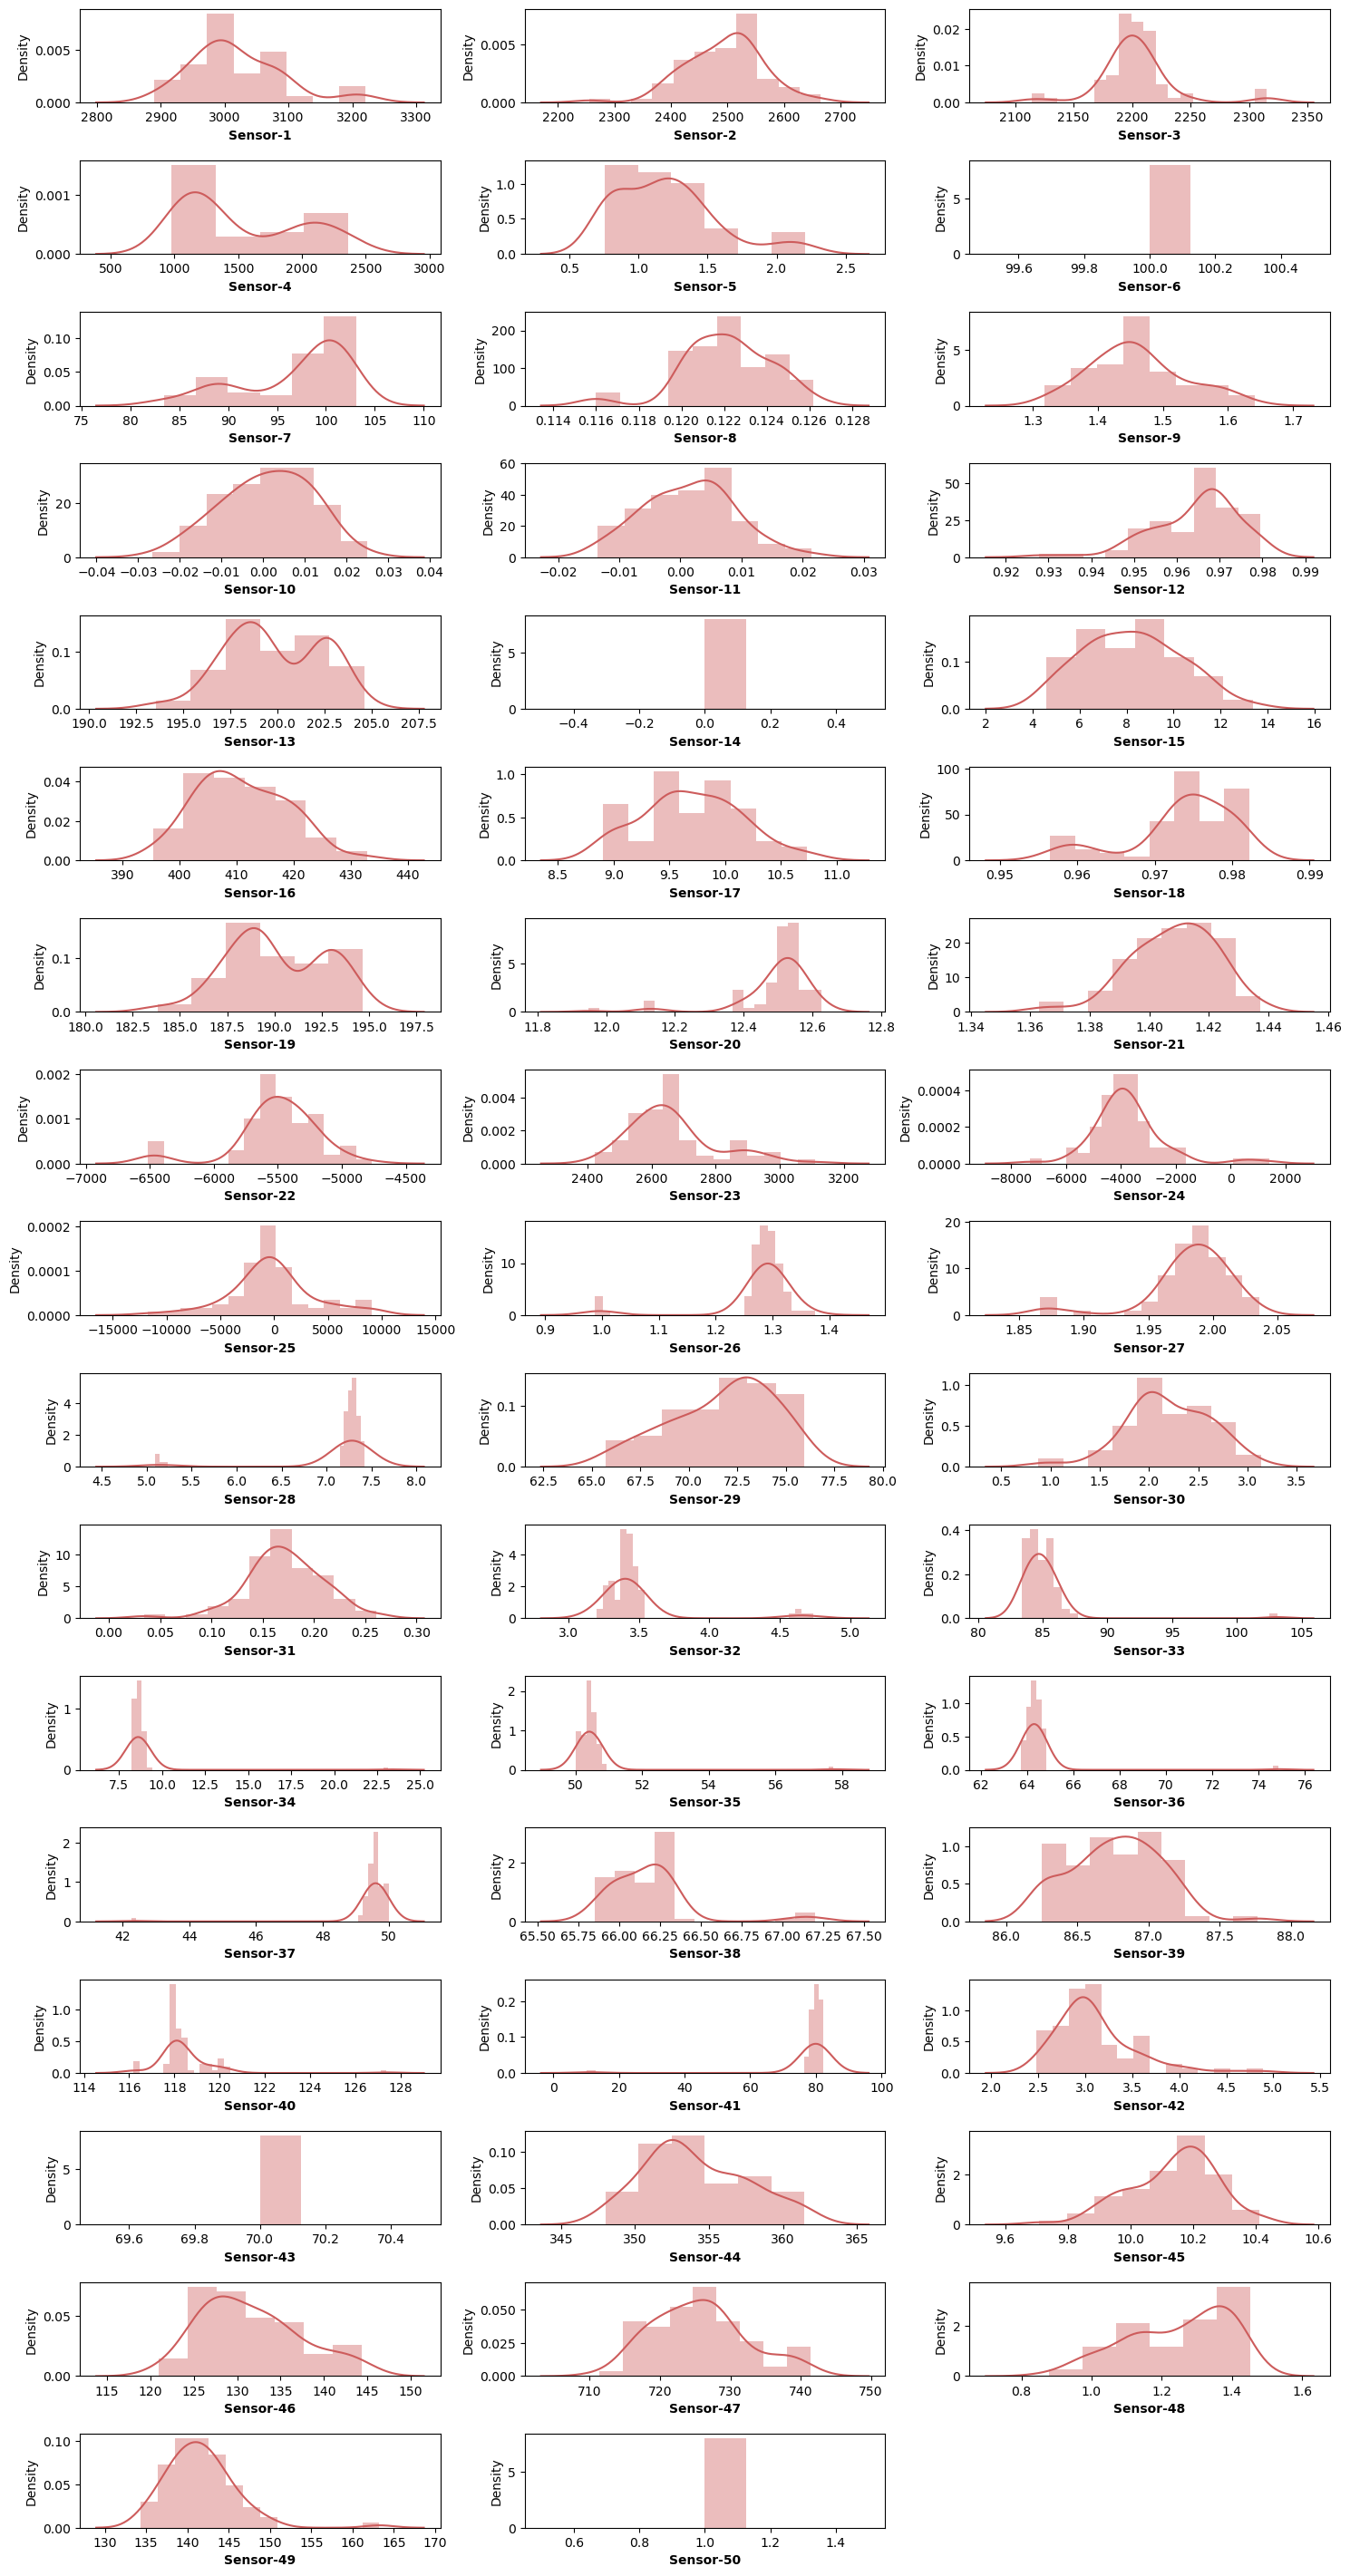

In [57]:
plt.figure(figsize=(15,100))

for i,cols in enumerate(train_df.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=train_df[cols] , color='indianred')
    plt.xlabel(cols , weight='bold')
    plt.tight_layout()

In [ ]:
# Some of the sensors follow poisson distribution

In [59]:
# to get an idea of what the distributions are
random_50_sensors = []
for i in range(50):
    if i not in random_50_sensors:
        random_50_sensors.append(np.random.randint(1, 591))
print(random_50_sensors)

[4, 458, 41, 305, 186, 43, 195, 379, 234, 47, 184, 1, 457, 227, 199, 464, 159, 523, 497, 111, 227, 571, 421, 271, 438, 273, 283, 168, 127, 297, 306, 375, 338, 447, 472, 420, 42, 142, 249, 15, 392, 299, 220, 407, 97]


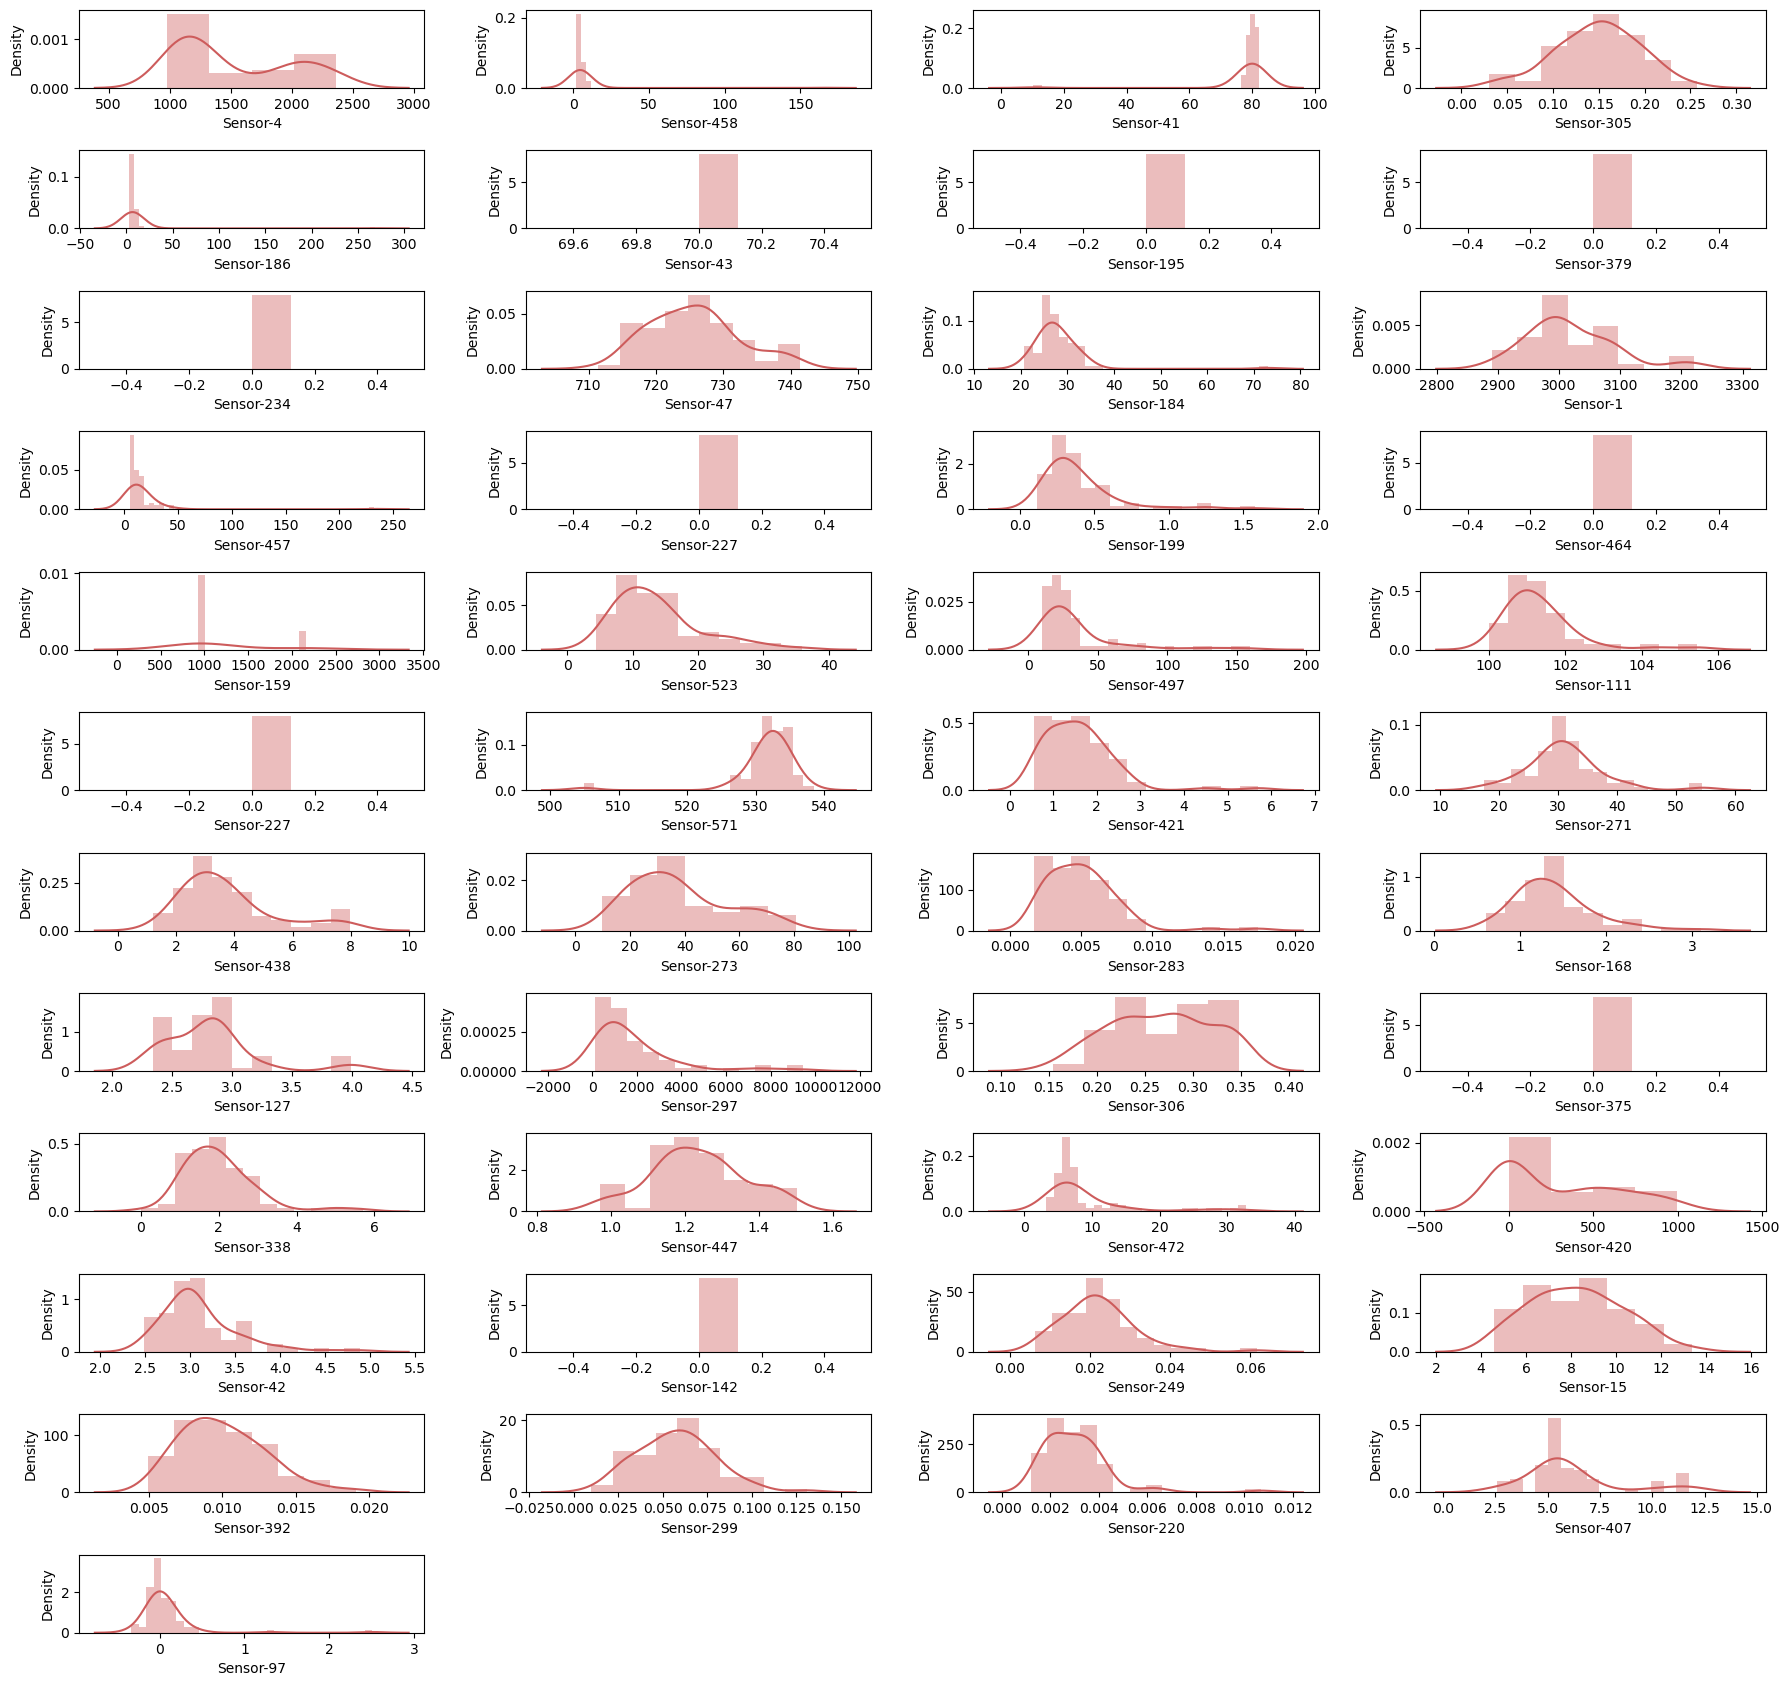

In [61]:
plt.figure(figsize=(18,105))
for i,cols in enumerate(train_df.columns[random_50_sensors]):
    plt.subplot(75,4,i+1)
    sns.distplot(x=train_df[cols], color='indianred')
    plt.xlabel(cols,weight=True)
    plt.tight_layout()

zero standard deviation (only single value); not much variation
not required

scaling: standardize data 
robust scaling to drop deatures with 0 sd

In [65]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    cols_to_drop = []
    num_cols = [cols for cols in df.columns if df[cols].dtype != 'O'] # filter out
    for cols in num_cols:
        if df[cols].std() == 0:  # if 0 sd
            cols_to_drop.append(cols)
    return cols_to_drop

def get_reduntant_cols(df, missing_threadhold = 0.7): # miising: if any column has more than 70% missing then remove 
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_threadhold].index)
    return cols_to_drop

In [67]:
cols_to_drop1 = get_reduntant_cols(train_df)
cols_to_drop1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [69]:
cols_to_drop2 = get_cols_with_zero_std_dev(train_df)
cols_to_drop2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [71]:
cols_to_drop = cols_to_drop1 + cols_to_drop2

Separate Features and Labels out:

In [73]:
X, y = train_df.drop(cols_to_drop, axis = 1), train_df[['Good/Bad']]

In [75]:
X.columns.value_counts().sum()

466

In [77]:
X

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.1800,0.1201,1.4532,0.0049,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.3824,-0.0001,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,101.1333,0.1208,1.5172,-0.0135,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,87.7411,0.1232,1.4446,-0.0050,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [81]:
df.shape[1] - X.columns.value_counts().sum()

126

In [83]:
len(cols_to_drop)

126

In [85]:
train_df.columns

Index(['Wafers', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5',
       'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [87]:
## Dependent feature variables

print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (80, 466)


,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [89]:
## Independent/Target Variables

print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (80, 1)


,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1


In [91]:
# remove the '-' from the wafer name
X['Wafers'] = X['Wafers'].str.replace('Wafer-', "")

In [93]:
X.head()

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


Data Transformation

In [95]:
# Data Transformation
from sklearn.pipeline import Pipeline # feature engineering
from sklearn.impute import KNNImputer, SimpleImputer
# KNNImputer: k nearest neighbour imputer; plot all data in 2d space, pick random point and consider the near k # and take avg of it and set it to a Nan value
from sklearn.preprocessing import StandardScaler, RobustScaler

imputer = KNNImputer(n_neighbors = 3)
scaler = RobustScaler()
preproccessing_pipeline = Pipeline(
    steps = [
        ('imputer', imputer), ('scaler', scaler)
    ]
)
preproccessing_pipeline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', RobustScaler())])

In [97]:
X

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.1800,0.1201,1.4532,0.0049,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,872,3043.18,2545.53,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.3824,-0.0001,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,815,3001.26,2519.92,2224.6778,1308.6479,1.3907,101.1333,0.1208,1.5172,-0.0135,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,893,3007.00,2572.62,2213.2111,2070.7147,1.9705,87.7411,0.1232,1.4446,-0.0050,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [99]:
X.values

array([['856', nan, 2532.45, ..., 0.0038, 104.3034, -1],
       ['889', 3221.21, 2391.2, ..., 0.0022, 27.7601, -1],
       ['827', 2951.85, 2525.0, ..., 0.0056, 53.8577, -1],
       ...,
       ['815', 3001.26, 2519.92, ..., 0.0042, 48.4818, -1],
       ['893', 3007.0, 2572.62, ..., 0.0047, 76.0035, -1],
       ['852', 3078.77, 2533.04, ..., 0.0033, 46.7092, -1]], dtype=object)

In [101]:
# Transform features
X_trans = preproccessing_pipeline.fit_transform(X)
print('Shape of transformed feature is:')
X_trans

Shape of transformed feature is:


array([[ 0.07216495, -0.02781221,  0.37395233, ...,  0.        ,
         0.75955556,  0.        ],
       [ 0.75257732,  2.50431022, -1.38644649, ..., -0.51612903,
        -0.52610857,  0.        ],
       [-0.5257732 , -0.60204699,  0.28110298, ...,  0.58064516,
        -0.08775867,  0.        ],
       ...,
       [-0.77319588, -0.03223295,  0.21779093, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.83505155,  0.03396281,  0.87459106, ...,  0.29032258,
         0.28421459,  0.        ],
       [-0.01030928,  0.86164048,  0.3813055 , ..., -0.16129032,
        -0.20782888,  0.        ]])

In [123]:
%pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [125]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

In [127]:
@dataclass

class ClusterDataInstances:
    X: np.array
    desc: str

    def get_ideal_no_of_clusters(self):
        try:
            print(f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []
            for i in range(1,11):
                kmeans = KMeans(n_clusters=i , random_state=51)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print("WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print("Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1,11), wcss , curve='convex' , direction='decreasing'
            )
            print(f"Ideal number of clusters to be formed: {knee_finder.knee}")
            return knee_finder.knee

        except Exception as e:
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self.get_ideal_no_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e 

In [129]:
## Cluster `Wafer` instances

cluster_wafers = ClusterDataInstances(X=X_trans, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 7157177.27241849
WCSS for n_clusters=2: 2060333.8515841991
WCSS for n_clusters=3: 1075254.4073827353
WCSS for n_clusters=4: 524782.5260513573
WCSS for n_clusters=5: 313479.74938253075
WCSS for n_clusters=6: 265287.4444024716
WCSS for n_clusters=7: 217149.06940449966
WCSS for n_clusters=8: 175625.86891642117
WCSS for n_clusters=9: 143054.49762960823
WCSS for n_clusters=10: 108725.106710906
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[ 0.07216495, -0.02781221,  0.37395233, ...,  0.75955556,
         0.        ,  1.        ],
       [ 0.75257732,  2.50431022, -1.38644649, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.5257732 , -0.60204699,  0.28110298, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.77319588, -0.03223295,  0.21779093, ..., -0.17805529,
         0.        ,  0.        ],
       [ 0.83505155,  0.03396281,  0.87459106, ...,  0.28421459,
         0.        ,  1.        ],
       [-0.01030928,  0.86164048,  0.3813055 , ..., -0.20782888,
         0.        ,  1.        ]])

In [131]:
## Clusters

np.unique(X_clus[:, -1])

array([0., 1., 2.])

In [133]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(17, 468)

In [135]:
## Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(62, 468)

In [137]:
## Cluster_3 data

wafers_clus[wafers_clus[:, -2] == 2].shape

(1, 468)

Resampleing of Training Instances

In [140]:
#%pip install scikit-learn
%pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [174]:
# use SMOTE library for data imbalance, split the data equally
from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import SMOTE

X = X_trans[:,:-1]
resampler = SMOTETomek(sampling_strategy="auto")
#resampler = SMOTETomek(random_state=52 ,  smote=SMOTE(k_neighbors=3))
X_res , y_res = resampler.fit_resample(X,y)

In [144]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (80, 466)
After resampling, Shape of training instances:  (148, 466)


In [146]:
## Target Category after resampling 

print(np.unique(y_res))
print(f'Value Counts: \n -1: {len(y_res[y_res== -1])} , 1:{len(y_res[y_res== 1])}')

[-1  1]
Value Counts: 
 -1: 148 , 1:148


In [105]:
# extreme gradient boosting xgboost
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   --- ------------------------------------ 4.7/56.8 MB 31.6 MB/s eta 0:00:02
   --------- ------------------------------ 13.9/56.8 MB 39.6 MB/s eta 0:00:02
   --------------- ------------------------ 22.3/56.8 MB 39.1 MB/s eta 0:00:01
   --------------------- ------------------ 30.9/56.8 MB 40.0 MB/s eta 0:00:01
   -------------------------- ------------- 37.2/56.8 MB 37.5 MB/s eta 0:00:01
   ------------------------------- -------- 44.6/56.8 MB 37.3 MB/s eta 0:00:01
   -------------------------------------- - 54.0/56.8 MB 38.6 MB/s eta 0:00:01
   ---------------------------------------  56.6/56.8 MB 38.0 MB/s eta 0:00:01
   ---------------------------------------- 56.8/56.8 MB 34.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_res , y_res , test_size=.33 , random_state=42 )
 
print(f"train set : {X_train.shape , y_train.shape}")
print(f"test set : {X_test.shape , y_test.shape}")

train set : ((99, 465), (99, 1))
test set : ((49, 465), (49, 1))


In [111]:
X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test
print(f"Shape of Train Set: {X_prep.shape , y_prep.shape}")
print(f"Shape of Test Set: {X_test_prep.shape,y_test_prep.shape}")

Shape of Train Set: ((99, 465), (99, 1))
Shape of Test Set: ((49, 465), (49, 1))


In [148]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.metrics import roc_auc_score

#Shortlisted base models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [150]:
## Function to display scores

def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

Evaluating SVC (kernel='linear') using cross-validation:

In [153]:
svc_scores = cross_val_score(svc_clf , X_prep , y_prep ,scoring='roc_auc' , cv= 10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [155]:
display_scores(svc_scores)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [157]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc

0.8975

Evaluating SVC (kernel='rbf') using cross-validation:

In [161]:
## SVC rbf Scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [163]:
display_scores(svc_rbf_scores)

Scores: [1.   1.   0.88 0.96 0.84 1.   0.88 1.   0.88 1.  ]
Mean: 0.944
Standard Deviation: 0.06248199740725324


In [165]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test_prep, svc_rbf_preds)
svc_rbf_auc

0.6875

Evaluating RandomForestClassifier using cross-validation:

In [168]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s


In [170]:
display_scores(random_clf_scores)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [172]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

0.98